# Table of Contents
- [Classification of the Iris dataset with a MLP](#Classification-of-the-Iris-dataset-with-a-MLP)
- [Binary classification of the IMDB movie reviews dataset with a MLP](#Binary-classification-of-the-IMDB-movie-reviews-dataset-with-a-MLP)

# 1  Classification of the Iris dataset with a MLP
In this exercise, we will build a small very simple MLP to classify irises into 3 dif-ferent species based on 4 measurements. We will keep this exercise very simple.Some things donotrepresent best practices

## 1.1  Load the Data
The iris dataset is built-in intosklearn.datasets. We use `return_X_y=True` to get a numpy array with the features, and a numpy array with the targets.Check the shape of these arrays. They should be`(150, 4)` and `(150, )`

In [59]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X # Features
y # labels
(X,y)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [60]:
!pip install keras

## 1.2  Build a MLP
We want to build an MLP consisting of:
- An input layer with the correct number of neurons. The name of the layerisinput. How many neurons do we need in the input layer?
- One hidden layer with 5 neurons using the *ReLU£* activation function. Thename of the layer ishidden
- One output layer with the correct number of neurons and the correct activation function for a classification problem. The name of the layer is output.

Follow the steps below:

1. Take a look at the examples on https://keras.io/api/models/sequential/.
2. An example on how to pass the activation function via the string identifier: https://keras.io/api/layers/activations/.
3. Write similar code to create the model.
4. Very often, it is convenient if we can easily recreate a model using a smallfunctionget_model. Rewrite the previous code to a small functionget_modelthat returns the model as described above. Take a look at https://keras.io/api/models/model/#with-the-sequential-class to see an example.
5. Create the model using the functionget_model.
6. Use thesummarymethod of the model to verify that your model has 43 parameters.
7. Convince yourself that you understand where this number comes from!Making a simple sketch of the model can be useful.

In [61]:
import keras
# dir(model) -> functies bekijken van model

#? https://keras.io/api/layers/core_layers/input/

def get_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=(4,), name="input")) #* input: 1 bij 4
    model.add(keras.layers.Dense(units=5, activation="relu", name="hidden")) # W^[1] = 4 bij 5 -> [4,5]
    model.add(keras.layers.Dense(units=3, activation="softmax", name="output")) # W^[2] = 5 bij 3 -> [5,3]
    return model

model = get_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

## 1.3  Compile the Model
Compile the model with the following options (example on https://keras.io/api/models/model_training_apis/):
- Use stochastic gradient descent with all the default parameters as the optimizer.
- Specify the correct loss for a multi-class classification problem, where eachinstance belongs to exactly one class. Take into account the shape of thetargets above which is (150, )


In [62]:

#* https://keras.io/api/models/model_training_apis/
#* https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy",metrics=["accuracy"])


# 1.4  Train the Model
Train the model for 20 epochs (example on
https://keras.io/api/models/model_training_apis/). Because we have such a small dataset we will use abatch size of 8 so that we have a reasonable number of updates per epoch.

Note: since we are not using any validation data we have no way of knowing whether the model is overfitting or not. Don’t do this in practice!

In [63]:
model.fit(X, y, epochs=10,batch_size=8)
#? Epoche is aantal keer dat je over de hele dataset gaat (150 samples)
#? Batch size is aantal groepjes in een epoche en één epoch is dan alle samples (batches) gezien hebben

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3400 - loss: 2.8624
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5867 - loss: 1.1858
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6400 - loss: 0.8964
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.8053
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.7398
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.6894
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 0.6459
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.6148
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7667 - loss: 0.5777
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.5387


## 1.5  Emulate the Calculations of the Model
This step is not necessary in practice. We include it here for a better under-standing of what is going on.First, compute the result of the model (the MLP) on a small batch.

1. Create a tensor called `X_batch` which consists of the first two trainingexamples. Use the slice operator. What is the shape of this tensor?

2. Call the model with `X_batch` as the input. Call the resulty_batch_pred.What is the shape of this tensor? What does each dimension mean
3.  Use a function ofkeras.opsto verify that the sum of each row is equalto one.Now, emulate these calculations “by hand” and verify that you get the sameresults.
   
   a.  First, extract the weights of the hidden layer and store them as W1 and b

In [64]:
# assume"model"is the name as signed to the MLP
W_hidden, bias_hidden = model.get_layer("hidden").get_weights()
print("hidden", W_hidden.shape, bias_hidden.shape)
W_output, bias_output = model.get_layer("output").get_weights()
print("output", W_output.shape, bias_output.shape)

hidden (4, 5) (5,)
output (5, 3) (3,)


In [65]:
X_batch = X[:2]
print(X_batch.shape)

(2, 4)


Do the same for the weights of the output layer.
b. Verify the shape of these 4 tensors. Make sure that you understand these.
c. Complete the following code, using only methods from `keras.ops`

In [66]:
z1 = keras.ops.matmul(X_batch, W_hidden) + bias_hidden
a1 = keras.ops.relu(z1)   # apply relu to z1
a1

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[3.68115589, 0.        , 1.91736461, 0.        , 0.        ],
       [3.35014489, 0.        , 1.72415553, 0.        , 0.        ]])>

In [67]:
z2 = keras.ops.matmul(a1, W_output) + bias_output  # linear transformation of output layer
a2 = keras.ops.softmax(z2)
print(a2)
y_batch_pred_2 = keras.ops.softmax(z2)  # apply appropriate activation function to z2

tf.Tensor(
[[0.57302752 0.32218105 0.10479144]
 [0.55796267 0.32723311 0.11480422]], shape=(2, 3), dtype=float64)


In [68]:

#? Model is het volledig bereken
model(X_batch)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.5730277 , 0.32218096, 0.10479146],
       [0.5579628 , 0.32723308, 0.1148042 ]], dtype=float32)>

# 2  Binary Classification with a MLP
In this exercise, we are going to classify (preprocessed) movie reviews as eitherpositive or negative. We will use the built-in IMDB (Internet Movie Database)Keras dataset for this
## 2.1  Load the Data
1. Use `keras.datasets.imdb.load_data()` to easily download the IMDBdataset.
2. Limit the vocabulary to the 10000 most frequent words, by using thenum_wordsargument. See `https://keras.io/api/datasets/imdb/for` information on how to use this function. A possible way of calling this function is: `(train_data, train_labels), (test_data, test_labels) = YOUR CODE HERE`

In [69]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

3. Check that both `train_data` and `test_data` contain 25000 examples.

In [70]:
train_data.shape, train_data.shape

((25000,), (25000,))

4. Print the features of the first training example. You should see somethinglike: `[1, 14, 22, 16, ..., 178, 32]`

In [71]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


5. Hence, each example is a list of integers. You can use the function in Figure 1 to convert such a list of integers back into English text. This way you can get a feel of what the review is like, but this is not what we will feed to the neural network

In [72]:
import numpy as np
def convert_to_english(list_of_integers):
    word_index = keras.datasets.imdb.get_word_index() # reverse the wordindex
    rv_word_index = {idx : word for(word, idx) in word_index.items() }
    # map each integer to a word and join all words together
    # Index 0,1 and 2 are reserved for 'padding','start of sequence '&' unknown'
    return " ".join(rv_word_index.get(idx - 3,"?")for idx in list_of_integers)
convert_to_english(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 2.2  Convert the Data 
It is not very convenient for a neural network to ingest list of integers. Instead,we will use `multi-hot encoding` to convert the lists of integers into vectors of0s and 1s
1. Write a function `convert_to_multi_hot(sequences, dimension)` that takes a numpy array of sequences (i.e. lists of integers) and returnsa numpy array of `shape(len(sequences), dimension)` where each row is a multi-hot encoded vector of length dimension. You can write thisfunction using “ordinary” loops. Later, we will see how you can make thistype of function more eﬀicient

In [73]:
def convert_to_multi_hot(sequences, dimension):
    # Create numpy array of the correct shape and datatype filled with zeros.
    output = np.zeros(shape=(sequences.shape[0], dimension), dtype=np.float32)
    for i in range(sequences.shape[0]):
        for j in sequences[i]:
            output[i,j] = 1
    return output

2. Convert the training and test data to multi-hot encoded vectors. Use adimension of 10000. (Since we used 10000 words)

In [74]:
X_train = convert_to_multi_hot(train_data, dimension=10_000)
X_test = convert_to_multi_hot(test_data, dimension=10_000)
#Renamethelabels
y_train = train_labels
y_test = test_labels

3. We will also need validation data. We will use the first 10000 examples from the test data as our validation data. The last 15000 examples will be used as our test data. Write code to create the validation and test data

In [75]:
print("X_test: ",len(X_test))

X_val = X_test[:10000]
y_val = y_test[:10000]
print("X_val: ",len(X_val))
print("y_val: ",len(y_val))

print("\n")
X_test = X_test[10000:]
y_test = y_test[10000:]
print("X_test: ",len(X_test))
print("y_test: ",len(y_test))

X_test:  25000
X_val:  10000
y_val:  10000


X_test:  15000
y_test:  15000


## 2.3  Build a Model
1. Build a model using the Sequential API. Use the following architecture:
   - Use theInputfunction/object to indicate the shape (excluding thebatch dimension) and optionally the data type of the input tensors.
   - A Denselayer with 16 units and the ReLU activation function.
   - A Dense layer with 16 units and the ReLU activation function.
   - ADenseoutput layer.
     - How many units should this layer have?
     - What is the most appropriate activation function for this layer,given that we are doing binary classification?
  2. Write a functionget_model()that returns this model. Ask for thesummaryof the returned model. You should see that the model has 160305 train-able parameters.

In [76]:
def get_model() -> keras.Sequential:
    """Returns a compiled keras Sequential model"""
    model = keras.Sequential()

    model.add(keras.Input(shape=[10000,]))
    model.add(keras.layers.Dense(units=16,activation="relu",name= "hidden_1"))
    model.add(keras.layers.Dense(units=16,activation="relu",name= "hidden_2"))

    model.add(keras.layers.Dense(units=1,activation="sigmoid",name= "output"))
    return model

In [77]:
model = get_model()
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

## 2.4  Compile the Model
1. Compile the model.
   - Use rmsprop as the optimizer with all the default parameter settings.
   - Specify the correct loss for a binary classification problem.
   - Track the accuracy metric.


In [78]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

## 2.5  Train the Model
1. Train the model.
   - Train it for 20 epochs.
   - Use a batch size of 512.
   - Be sure to use the validation data.
2. Use the history object returned by thefitmethod to plot the learningcurves. You can use the code in Figure 2 to do this

In [81]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))
    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

In [80]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=8)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8696 - loss: 0.3180
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9146 - loss: 0.2268
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9253 - loss: 0.2037
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9295 - loss: 0.1947
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9354 - loss: 0.1849
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9389 - loss: 0.1793
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9402 - loss: 0.1743
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9428 - loss: 0.1695
Epoch 9/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9445 - loss: 0.1661
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9448 - loss: 0.1633


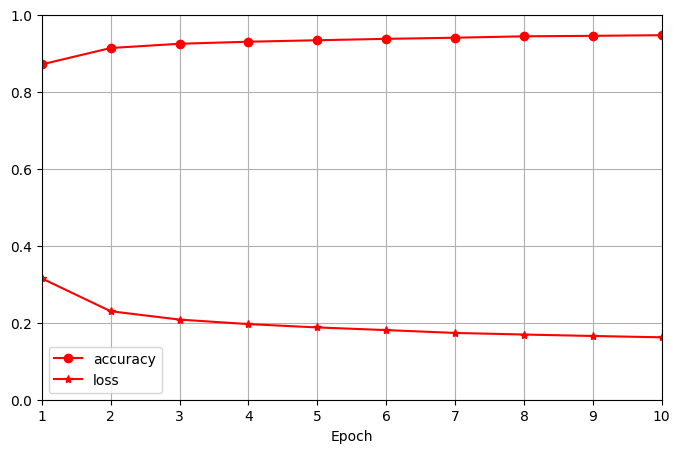

In [24]:
plot_learning_curves(history)

3. You should notice that the model is overfitting.
4. Initialize and compile the model again, but train for fewer epochs, so thatthe model does not overfit

## 2.6  Evaluate the Model
1. Use the evaluatemethod to evaluate the model on the test set.
2. What is the performance of the model on the test set1?

# 3  MNIST with a Deep MLP
This exercise is based on exercise 10 from chapter 10 of the book “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow” by Aurélien Géron. However, it contains more detailed instructions.

## 3.1  Load and Preprocess the MNIST dataset
1. Use `keras.datasets.mnist.load_data()` to easily download the MNIST dataset.

In [25]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train[:10], y_train[:10], X_test[:10], y_test[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [26]:
print("X_train[2].shape: ", X_train[2].shape)
print("y_train: ", y_train.shape)
print("X_train[0].shape: ", X_train[0].shape)

X_train[2].shape:  (28, 28)
y_train:  (60000,)
X_train[0].shape:  (28, 28)


2. Use the last 10000 images of the training set as your validation set. This will give you 50000 training images, 10000 validation images, and 10000 test images.

3. The pixel values are stored as integers (from 0 to 255). Convert them to floats between 0.0 and 1.0(by dividing by 255).

In [27]:
X_val = X_train[-10_000:] / 255.0
y_val = y_train[-10_000:]

X_train = X_train[:-10_000:] / 255.0
y_train = y_train[:-10_000:]

X_test = X_test / 255.0

print("Training data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
print("Test data:", X_test.shape, y_test.shape)
print("---")
print("y_val.shape:", y_val.shape)
print("X_val.shape:", X_val.shape)

Training data: (50000, 28, 28) (50000,)
Validation data: (10000, 28, 28) (10000,)
Test data: (10000, 28, 28) (10000,)
---
y_val.shape: (10000,)
X_val.shape: (10000, 28, 28)


In [28]:
import numpy as np
np.unique(X_val)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

4. Reshape the tensors so that they have rank 2 instead of rank 3.

In [29]:
X_val = X_val.reshape(-1, 28 * 28) #? 28 * 28 is gehardcodeerd, normaal zou je dit dynamisch doen
X_train = X_train.reshape((-1, 28 * 28)) #? -1 betekent dat numpy zelf moet uitrekenen hoeveel rijen er moeten komen
X_test = X_test.reshape((-1, 28 * 28)) #? 28 * 28 is de breedte van een plaatje

print("X_val.shape:", X_val.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_val.shape: (10000, 784)
X_train.shape: (50000, 784)
X_test.shape: (10000, 784)


# 3.2  Build a MLP
1. Use the Sequential API to build to build a model with two hidden layers and one output layer.

In [30]:
dims = 28*28
def get_model() -> keras.Sequential:
    """Model with two hidden layers and one output layer

    Returns:
        keras.Sequential: Model
    """
    model = keras.Sequential([
        keras.Input(shape=(dims,)), #? meegeven als een tuple
        keras.layers.Dense(units=300, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),

        keras.layers.Dense(units=10, activation="softmax") #? Multiclass, dus softmax
    ])

    return model

In [31]:
model = get_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │

In [32]:

#* inputs +
params_1 = 884 * 300 + 300
params_2 = 300 * 100 + 100
params_3 = 100 * 10 + 10

print("Params 1st dense layer: " + str(params_1))
print("Params 2nd dense layer: " + str(params_2))
print("Params output layer: " + str(params_3))

Params 1st dense layer: 265500
Params 2nd dense layer: 30100
Params output layer: 1010


2. Use the ReLU activation function for the hidden layers (with 300 and 100 units each) and the appropriate activation function and number of units for the output layer, given that we are doing multiclass classification.

In [33]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [34]:

# ! https://keras.io/api/callbacks/early_stopping/
#* validation loss gaat bepalen of je bent aan het overfitten of niet
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)
#! https://keras.io/api/callbacks/tensorboard/
#* TensorBoard is een tool om je model te visualiseren
tensorboard_logging = keras.callbacks.TensorBoard()

#! https://keras.io/api/callbacks/model_checkpoint/
#* ModelCheckpoint slaat je model op tijdens het trainen
checkpoint_path = "mnist_model.h5"
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
)

model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          batch_size=256,
          epochs=30,
          callbacks=[early_stopping, tensorboard_logging, model_checkpoint])

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4178 - loss: 1.8349

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5939 - loss: 1.4493 - val_accuracy: 0.8091 - val_loss: 0.8666
Epoch 2/30
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.8130

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8175 - loss: 0.7306 - val_accuracy: 0.8625 - val_loss: 0.5603
Epoch 3/30
191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8472 - loss: 0.5790

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8541 - loss: 0.5486 - val_accuracy: 0.8775 - val_loss: 0.4575
Epoch 4/30
190/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8649 - loss: 0.4922

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8707 - loss: 0.4726 - val_accuracy: 0.8872 - val_loss: 0.4093
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8794 - loss: 0.4327

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8796 - loss: 0.4315 - val_accuracy: 0.8941 - val_loss: 0.3794
Epoch 6/30
193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8847 - loss: 0.4110

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8859 - loss: 0.4051 - val_accuracy: 0.8994 - val_loss: 0.3604
Epoch 7/30
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8883 - loss: 0.3911

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8901 - loss: 0.3870 - val_accuracy: 0.9019 - val_loss: 0.3479
Epoch 8/30
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8922 - loss: 0.3789

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8935 - loss: 0.3736 - val_accuracy: 0.9051 - val_loss: 0.3373
Epoch 9/30
191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8984 - loss: 0.3581

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8967 - loss: 0.3629 - val_accuracy: 0.9059 - val_loss: 0.3303
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8963 - loss: 0.3552

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8985 - loss: 0.3545 - val_accuracy: 0.9091 - val_loss: 0.3241
Epoch 11/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8987 - loss: 0.3519

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9009 - loss: 0.3476 - val_accuracy: 0.9092 - val_loss: 0.3198
Epoch 12/30
190/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9041 - loss: 0.3389

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9027 - loss: 0.3419 - val_accuracy: 0.9127 - val_loss: 0.3138
Epoch 13/30
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.3319

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9040 - loss: 0.3368 - val_accuracy: 0.9126 - val_loss: 0.3103
Epoch 14/30
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9046 - loss: 0.3370

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9051 - loss: 0.3324 - val_accuracy: 0.9132 - val_loss: 0.3073
Epoch 15/30
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.3299

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9060 - loss: 0.3289 - val_accuracy: 0.9137 - val_loss: 0.3043
Epoch 16/30
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9075 - loss: 0.3287

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9076 - loss: 0.3254 - val_accuracy: 0.9147 - val_loss: 0.3024
Epoch 17/30
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9081 - loss: 0.3270

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9086 - loss: 0.3225 - val_accuracy: 0.9167 - val_loss: 0.3003
Epoch 18/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9086 - loss: 0.3186

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9096 - loss: 0.3198 - val_accuracy: 0.9156 - val_loss: 0.2985
Epoch 19/30
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9130 - loss: 0.3142

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9103 - loss: 0.3173 - val_accuracy: 0.9159 - val_loss: 0.2964
Epoch 20/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.3212

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9109 - loss: 0.3153 - val_accuracy: 0.9178 - val_loss: 0.2939
Epoch 21/30
185/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.3072

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9116 - loss: 0.3133 - val_accuracy: 0.9184 - val_loss: 0.2925
Epoch 22/30
191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.3066

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9122 - loss: 0.3115 - val_accuracy: 0.9176 - val_loss: 0.2921
Epoch 23/30
192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9141 - loss: 0.3068

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9124 - loss: 0.3100 - val_accuracy: 0.9183 - val_loss: 0.2907
Epoch 24/30
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9138 - loss: 0.3067

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9138 - loss: 0.3085 - val_accuracy: 0.9187 - val_loss: 0.2897
Epoch 25/30
191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9124 - loss: 0.3081

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9139 - loss: 0.3071 - val_accuracy: 0.9199 - val_loss: 0.2885
Epoch 26/30
190/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9132 - loss: 0.3091

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9142 - loss: 0.3056 - val_accuracy: 0.9202 - val_loss: 0.2873
Epoch 27/30
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9128 - loss: 0.3084

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9148 - loss: 0.3042 - val_accuracy: 0.9204 - val_loss: 0.2871
Epoch 28/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9152 - loss: 0.3017

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9156 - loss: 0.3033 - val_accuracy: 0.9207 - val_loss: 0.2856
Epoch 29/30
192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9125 - loss: 0.3097

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9149 - loss: 0.3021 - val_accuracy: 0.9210 - val_loss: 0.2845
Epoch 30/30
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9189 - loss: 0.2965

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9162 - loss: 0.3009 - val_accuracy: 0.9218 - val_loss: 0.2837


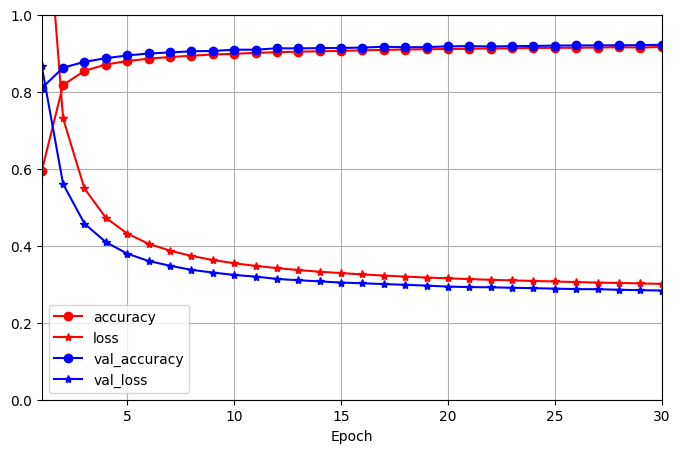

In [35]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()
plot_learning_curves(model.history)

3. Create a function `get_model()`that returns this model